In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
%ls data_unzipped/PartD_14/

PartD_Prescriber_PUF_NPI_DRUG_14.zip
PartD_Prescriber_PUF_NPI_Drug_14-SAS-Infile.sas
PartD_Prescriber_PUF_NPI_Drug_14.txt


In [3]:
df = pd.read_csv(r'data_unzipped/PartD_14/PARTD_PRESCRIBER_PUF_NPI_DRUG_14.txt', delimiter='\t')
df.head()

,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_CITY,NPPES_PROVIDER_STATE,SPECIALTY_DESCRIPTION,DESCRIPTION_FLAG,DRUG_NAME,GENERIC_NAME,BENE_COUNT,TOTAL_CLAIM_COUNT,TOTAL_DAY_SUPPLY,TOTAL_DRUG_COST,BENE_COUNT_GE65,BENE_COUNT_GE65_SUPPRESS_FLAG,TOTAL_CLAIM_COUNT_GE65,GE65_SUPPRESS_FLAG,TOTAL_DAY_SUPPLY_GE65,TOTAL_DRUG_COST_GE65
0,1952310666,A'BODJEDI,ENENGE,STAMFORD,CT,Psychiatry,S,ABILIFY,ARIPIPRAZOLE,NaN,14,540,18898.79,NaN,*,NaN,*,NaN,NaN
1,1952310666,A'BODJEDI,ENENGE,STAMFORD,CT,Psychiatry,S,ALPRAZOLAM,ALPRAZOLAM,31.0,283,7608,2193.15,14.0,NaN,93.0,NaN,2883.0,539.75
2,1952310666,A'BODJEDI,ENENGE,STAMFORD,CT,Psychiatry,S,ALPRAZOLAM ER,ALPRAZOLAM,NaN,11,308,136.18,0.0,NaN,0.0,NaN,0.0,0.00
3,1952310666,A'BODJEDI,ENENGE,STAMFORD,CT,Psychiatry,S,AMBIEN,ZOLPIDEM TARTRATE,NaN,18,540,5996.59,NaN,*,NaN,*,NaN,NaN
4,1952310666,A'BODJEDI,ENENGE,STAMFORD,CT,Psychiatry,S,AMBIEN CR,ZOLPIDEM TARTRATE,NaN,12,360,3938.66,NaN,*,12.0,NaN,360.0,3938.66


In [5]:
df[['NPI','SPECIALTY_DESCRIPTION', 'DRUG_NAME', 'TOTAL_DAY_SUPPLY']].head()

,NPI,SPECIALTY_DESCRIPTION,DRUG_NAME,TOTAL_DAY_SUPPLY
0,1952310666,Psychiatry,ABILIFY,540
1,1952310666,Psychiatry,ALPRAZOLAM,7608
2,1952310666,Psychiatry,ALPRAZOLAM ER,308
3,1952310666,Psychiatry,AMBIEN,540
4,1952310666,Psychiatry,AMBIEN CR,360


In [6]:
len(df.DRUG_NAME.value_counts())

2703

In [8]:
len(df.SPECIALTY_DESCRIPTION.value_counts())

191

In [14]:
# ~ 338 drugs to cover 90% of all prescriptions
df['DRUG_NAME'].value_counts(normalize=True).sort_values(ascending=False)[:338].sum()

0.9008846365003337

In [10]:
drug_claim_totals = df.groupby('DRUG_NAME').TOTAL_CLAIM_COUNT.sum()
total_claims = df.TOTAL_CLAIM_COUNT.sum()
drug_claim_percent = drug_claim_totals / total_claims

In [11]:
# ~225 drugs cover 90% of all claims
drug_claim_percent.sort_values(ascending=False)[:225].sum()

0.902651612873512

In [12]:
len(drug_claim_totals)

2703

There are 2737 different drug names in the claims. The top 225 prescribed drugs account for 90% of all of the claims.

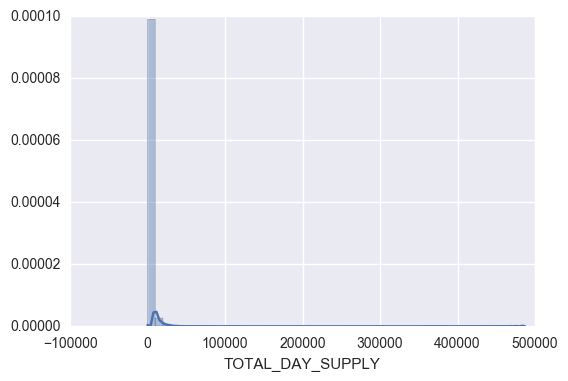

In [17]:
sns.distplot(df.TOTAL_DAY_SUPPLY)
None

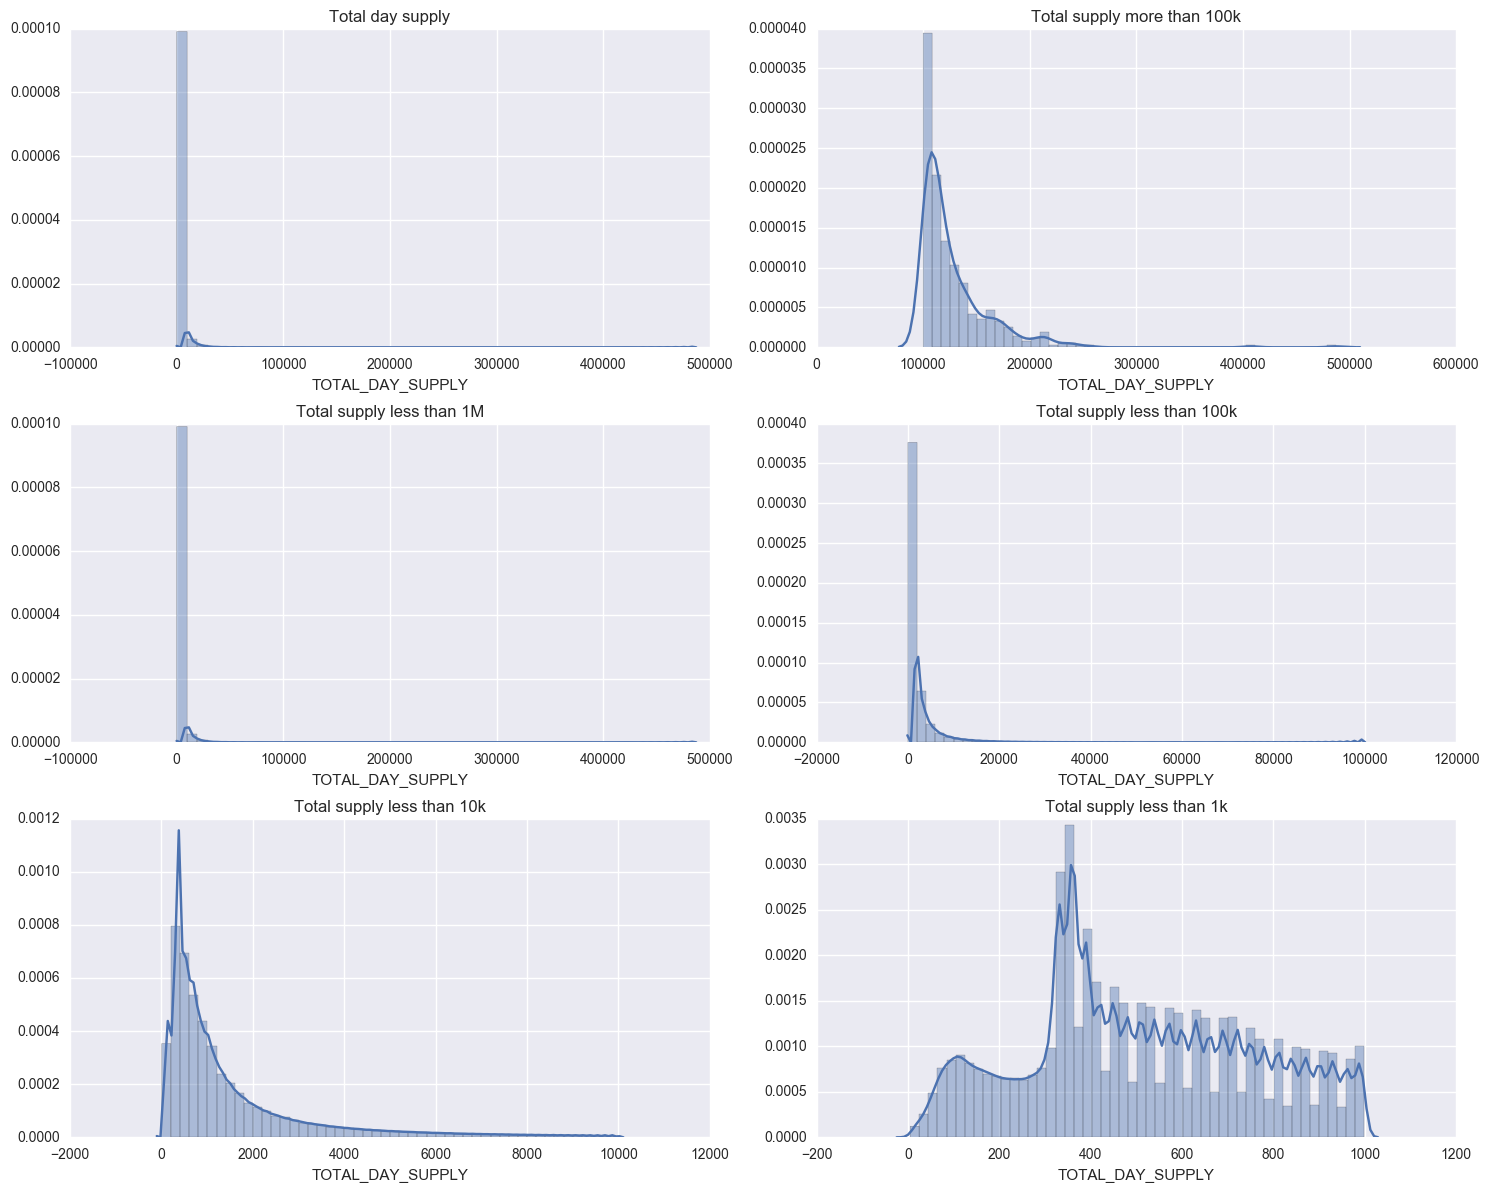

In [22]:
plt.subplot(3,2,1)
sns.distplot(df.TOTAL_DAY_SUPPLY)
sns.plt.title('Total day supply')
sns.plt.gcf().set_size_inches(15,12)

plt.subplot(3,2,2)
sns.distplot(df[df.TOTAL_DAY_SUPPLY > int(1e5)].TOTAL_DAY_SUPPLY)
sns.plt.title('Total supply more than 100k')

plt.subplot(3,2,3)
sns.distplot(df[df.TOTAL_DAY_SUPPLY < int(1e6)].TOTAL_DAY_SUPPLY)
sns.plt.title('Total supply less than 1M')

plt.subplot(3,2,4)
sns.distplot(df[df.TOTAL_DAY_SUPPLY < int(1e5)].TOTAL_DAY_SUPPLY)
sns.plt.title('Total supply less than 100k')

plt.subplot(3,2,5)
sns.distplot(df[df.TOTAL_DAY_SUPPLY < int(1e4)].TOTAL_DAY_SUPPLY)
sns.plt.title('Total supply less than 10k')

plt.subplot(3,2,6)
sns.distplot(df[df.TOTAL_DAY_SUPPLY < int(1e3)].TOTAL_DAY_SUPPLY)
sns.plt.title('Total supply less than 1k')
plt.tight_layout()

In [31]:
df[df.TOTAL_DAY_SUPPLY > int(1e5)][['NPPES_PROVIDER_FIRST_NAME', 'DRUG_NAME', 'SPECIALTY_DESCRIPTION', 'TOTAL_CLAIM_COUNT', 'TOTAL_DAY_SUPPLY']].sort_values('TOTAL_DAY_SUPPLY', ascending=False).head(15)

,NPPES_PROVIDER_FIRST_NAME,DRUG_NAME,SPECIALTY_DESCRIPTION,TOTAL_CLAIM_COUNT,TOTAL_DAY_SUPPLY
9346913,MARC,WARFARIN SODIUM,Internal Medicine,11604,487092
23426079,WILLIAM,WARFARIN SODIUM,Cardiology,6029,407617
8110871,KATHLEEN,WARFARIN SODIUM,Internal Medicine,3256,256530
11824087,SHIU,NAPHAZOLINE HCL,Ophthalmology,7215,243610
898054,ANALISA,LUMIGAN,Ophthalmology,8938,238990
7271784,BUTCHAIAH,HYDROCODONE-ACETAMINOPHEN,Physical Medicine and Rehabilitation,7979,237610
6014442,DARLENE,WARFARIN SODIUM,Pulmonary Disease,3468,233009
17944358,EDUARDO,CLONAZEPAM,Psychiatry,7675,227163
21340383,VIKRAM,WARFARIN SODIUM,Internal Medicine,4515,218895
23176031,RICHARD,WARFARIN SODIUM,Internal Medicine,4908,217042
